<a href="https://colab.research.google.com/github/NavidMirmohammadsadeghi/MNIST_Best_Keras_Trained/blob/master/Keras_Sequantial_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [3]:
%pylab inline
from matplotlib import pyplot as plt
import matplotlib.image as img

Populating the interactive namespace from numpy and matplotlib


In [0]:
train_data = pd.read_csv('train.csv')

In [14]:
train_data.shape

(42000, 785)

In [0]:
train_data = np.array(train_data)

In [16]:
# Extracting the Correct Images from the Train file
images_file = []

for y in range(train_data.shape[0]):
    if y%5000 == 0:
        print('This Many is Reshaped: ' + str(y))
    current_image = np.zeros((28,28))
    for x in range(1,784):
            i = x//28
            j = x%28
            current_image[i,j] = train_data[y,x]
    images_file.append(current_image)

This Many is Reshaped: 0
This Many is Reshaped: 5000
This Many is Reshaped: 10000
This Many is Reshaped: 15000
This Many is Reshaped: 20000
This Many is Reshaped: 25000
This Many is Reshaped: 30000
This Many is Reshaped: 35000
This Many is Reshaped: 40000


In [17]:
len(images_file)

42000

In [18]:
train_data[120,0]

7

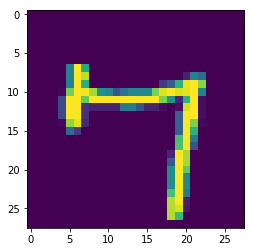

In [19]:
plt.imshow(images_file[120])

In [121]:
x_train = np.array(images_file)
x_train.shape

(42000, 28, 28)

In [0]:
y_train = np.array(train_data[:,0])
batch_size = 128
num_classes = 10
epochs = 20

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size = 0.1,shuffle = False)

In [0]:
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [125]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print('x_test shape:', x_test.shape)
print(x_test.shape[0], 'test samples')

x_train shape: (37800, 28, 28, 1)
37800 train samples
x_test shape: (4200, 28, 28, 1)
4200 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [127]:
train_data[0,0]

1

In [75]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
epochs = 50

In [0]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(16,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
#optimizer = keras.optimizers.SGD()
#model.compile(loss = keras.losses.categorical_crossentropy,
              #optimizer = optimizer,
              #metrics = ['accuracy'])


In [138]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 37800 samples, validate on 4200 samples
Epoch 1/50
37800/37800 [==============================] - 9s 232us/step - loss: 0.7835 - acc: 0.7353 - val_loss: 0.1348 - val_acc: 0.9581
Epoch 2/50
37800/37800 [==============================] - 6s 147us/step - loss: 0.1846 - acc: 0.9425 - val_loss: 0.0792 - val_acc: 0.9750
Epoch 3/50
37800/37800 [==============================] - 6s 146us/step - loss: 0.1274 - acc: 0.9620 - val_loss: 0.0574 - val_acc: 0.9831
Epoch 4/50
37800/37800 [==============================] - 6s 146us/step - loss: 0.1032 - acc: 0.9678 - val_loss: 0.0489 - val_acc: 0.9845
Epoch 5/50
37800/37800 [==============================] - 5s 145us/step - loss: 0.0910 - acc: 0.9728 - val_loss: 0.0460 - val_acc: 0.9867
Epoch 6/50
37800/37800 [==============================] - 5s 145us/step - loss: 0.0788 - acc: 0.9765 - val_loss: 0.0436 - val_acc: 0.9867
Epoch 7/50
37800/37800 [==============================] - 5s 144us/step - loss: 0.0716 - acc: 0.9786 - val_loss: 0.0377 - v

In [103]:
test_data = pd.read_csv('test.csv')
test_data = np.array(test_data)
test_data.shape

(28000, 784)

In [105]:
# Extracting the Correct Images from the Train file
images_file_test = []

for y in range(test_data.shape[0]):
    if y%5000 == 0:
        print('This Many is Reshaped: ' + str(y))
    current_image = np.zeros((28,28))
    for x in range(1,784):
            i = x//28
            j = x%28
            current_image[i,j] = test_data[y,x]
    images_file_test.append(current_image)

This Many is Reshaped: 0
This Many is Reshaped: 5000
This Many is Reshaped: 10000
This Many is Reshaped: 15000
This Many is Reshaped: 20000
This Many is Reshaped: 25000


In [106]:
test_data = np.array(images_file_test)
test_data.shape

(28000, 28, 28)

In [0]:
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    test_data = test_data.reshape(test_data.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    test_data = test_data.reshape(test_data.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
test_data = test_data.astype('float32')
test_data /= 255

In [0]:
predicted_answers = model.predict(test_data)

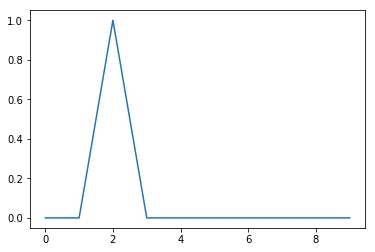

In [110]:
plt.plot(predicted_answers[0])

In [111]:
np.argmax(predicted_answers[0])

2

(array([2761., 3181., 2812., 2770., 2727., 2535., 2739., 2895., 2791.,
        2789.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

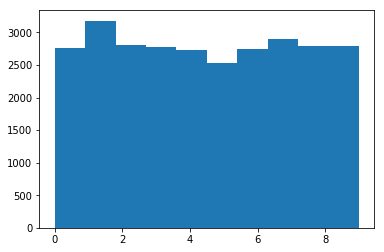

In [112]:
final_labels = [np.argmax(i) for i in predicted_answers]
plt.hist(final_labels)

In [113]:
submission_file = pd.DataFrame()
submission_file['ImageId'] = np.arange(1,28001)
submission_file['Label']   = final_labels
submission_file.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [0]:
submission_file.to_csv('sample_submission.csv',index = False)